In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sb
from datetime import datetime, timedelta



In [176]:
csm_df = pd.read_csv('/Users/idanshamir/Downloads/Data_Analyst_Company_Activity.csv',index_col='id')
csm_df.head()

,company_id,date,intros,invites,hires,csm_mails,csm
id,,,,,,,
1,1,2016-01-01,10,0,0,0,"Rice, Ethan"
2,1,2016-01-03,4,2,0,0,"Rice, Ethan"
3,1,2016-01-07,10,0,0,2,"Rice, Ethan"
4,1,2016-01-11,6,1,1,0,"Rice, Ethan"
5,1,2016-01-14,6,0,0,0,"Rice, Ethan"


In [177]:
print 'observation number:', len(csm_df)

observation number: 14514


In [178]:
#check feature types
csm_df.dtypes

company_id     int64
date          object
intros         int64
invites        int64
hires          int64
csm_mails      int64
csm           object
dtype: object

In [179]:
#change date column to date type
csm_df['date'] = csm_df['date'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [180]:
#group by manager to see how they differ in hires and emails sent
manager_gb = csm_df.groupby(['csm']).sum()
manager_gb['days_worked'] = csm_df.groupby(['csm']).date.nunique()
manager_gb.drop('company_id',axis=1,inplace=True)
columns = ['intros','invites','hires','csm_mails']

# divide every manager with number of working days
for col in columns:
    manager_gb[col] = manager_gb[col] / manager_gb['days_worked']

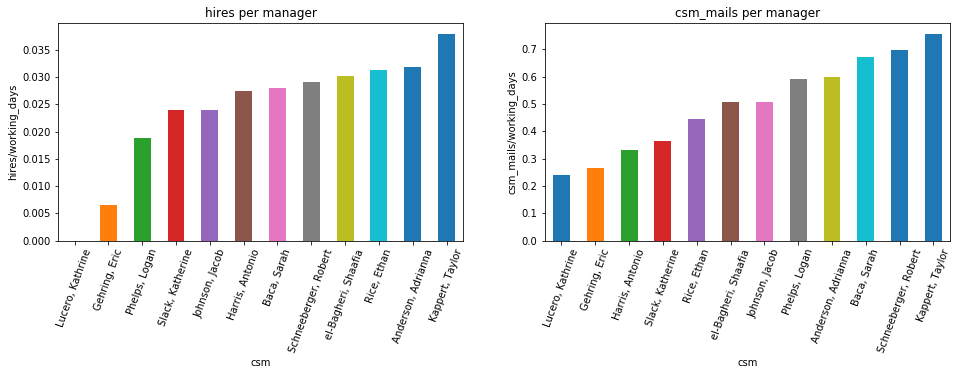

In [196]:
plt.figure(figsize=(16,4))
for i,col in enumerate(['hires','csm_mails'],1):
    temp = manager_gb[col]
    temp = temp.sort_values()
    plt.subplot(1,2,i)
    plt.title(str(col)+' per manager')
    temp.plot.bar()
    plt.ylabel(str(col)+'/working_days')
    plt.xticks(rotation=70)
plt.show()

we can see Kappert that Taylor has sent the most emails & hired the most people

on the other hand, Lucero Kathrine wasn't responsible for any hires

assuming all companies are the same number of days with us, i will check the differences between

0- comapnies with no hires

1- companies with hires

In [203]:
# i will creat a grouped by table by company and with it will be able to cluster different companies
company_gb = csm_df.groupby(['company_id']).sum()

conditions=[ (company_gb['hires']==0),\
            ((company_gb['hires']>0))]
choices=[0,1]
company_gb['hired?'] = np.select(conditions,choices)
hired_vs_didnt = company_gb.groupby('hired?').mean()

# further - cluster according to intros and check whether there's any relation between number of intros to emails sent, and to invitations sent


In [204]:
hired_vs_didnt

,intros,invites,hires,csm_mails
hired?,,,,
0,594.916667,61.083333,0.00,29.666667
1,1382.979167,161.791667,3.75,68.854167


it's clear that companies that never hired, received less emails, and therefore have lesser intros, invites and hires.

In [217]:
print 'correlation between hires and emails sent:', company_gb.corrwith(company_gb['csm_mails'])['hires']
print 'amount of emails sent is somewhat correlated with hires\nit is yet not significant to say that emails add value but we do see a linear relation'
print 'we also saw it in the hired? table,\nwhere companies which had any hires receive ~40 mails more than those which didnt hire'


correlation between hires and emails sent: 0.6649974581039515
amount of emails sent is somewhat correlated with hires
it is yet not significant to say that emails add value but we do see a linear relation
we also saw it in the hired? table,
where companies which had any hires receive ~40 mails more than those which didnt hire
